# Exploring Dandiset 001174: Calcium Imaging in SMA and M1 of Macaques

> **Note**: This notebook was AI-generated and has not been fully verified. Exercise caution when interpreting the code or results.

## Overview of the Dandiset

This notebook explores [Dandiset 001174 (version 0.250331.2218)](https://dandiarchive.org/dandiset/001174/0.250331.2218), which contains calcium imaging data from the supplementary motor area (SMA) and primary motor area (M1) of macaques. 

The dataset was created by researchers studying motor cortex activity in non-human primates. It uses calcium imaging with miniature microscopes to examine the activity patterns of projection neurons in deep layers of the SMA and M1 in rhesus macaques.

These recordings capture calcium transients while the animals were either at rest or engaged in arm-reaching tasks. This allows for the study of neuronal coactivation and sequential activation patterns in these motor regions.

## What This Notebook Covers

In this notebook, we will:

1. Load the Dandiset using the DANDI API
2. Explore the metadata and structure of the NWB files
3. Load and visualize calcium imaging data from one of the NWB files
4. Examine the ROI segmentation masks
5. Analyze calcium signals from different ROIs
6. Visualize calcium events and activity patterns

## Required Packages

The following packages are required to run this notebook:

- `pynwb`: For working with NWB files
- `h5py`: For handling HDF5 files (which NWB files are based on)
- `remfile`: For reading remote files
- `numpy`: For numerical operations
- `matplotlib`: For plotting and visualization
- `dandi`: For accessing the DANDI archive
- `seaborn`: For enhanced visualizations

In [1]:
# Import packages
import pynwb
import h5py
import remfile
import numpy as np
import matplotlib.pyplot as plt
from itertools import islice
from dandi.dandiapi import DandiAPIClient
import seaborn as sns

# Set up visualization style
sns.set_theme()
plt.rcParams['figure.figsize'] = (12, 8)

## Loading the Dandiset

In [2]:
# Connect to DANDI archive
client = DandiAPIClient()
dandiset = client.get_dandiset("001174", "0.250331.2218")

# Print basic information about the Dandiset
metadata = dandiset.get_raw_metadata()
print(f"Dandiset name: {metadata['name']}")
print(f"Dandiset URL: {metadata['url']}")
print(f"Description: {metadata['description'][:500]}...")  # Show first 500 characters

Dandiset name: Calcium imaging in SMA and M1 of macaques
Dandiset URL: https://dandiarchive.org/dandiset/001174/0.250331.2218
Description: The study of motor cortices in non-human primates is relevant to our understanding of human motor control, both in healthy conditions and in movement disorders. Calcium imaging and miniature microscopes allow the study of multiple genetically identified neurons with excellent spatial resolution. We used this method to examine activity patterns of projection neurons in deep layers of the supplementary motor (SMA) and primary motor areas (M1) in four rhesus macaques. We implanted gradient index le...


## Exploring the Dandiset Assets

Let's explore the files (assets) available in this Dandiset.

In [3]:
# List some assets in the Dandiset
assets = dandiset.get_assets()
print("\nFirst 5 assets:")
for asset in islice(assets, 5):
    print(f"- {asset.path} (ID: {asset.identifier}) - Size: {asset.size/1e6:.1f} MB")


First 5 assets:
- sub-V/sub-V_ses-20230309T110929_ophys.nwb (ID: a2b04c7f-f671-4a55-ac36-5df4d842dfc2) - Size: 10659.7 MB
- sub-Q/sub-Q_ophys.nwb (ID: de07db56-e7f3-4809-9972-755c51598e8d) - Size: 790.1 MB
- sub-Q/sub-Q_ses-20220922T131747_ophys.nwb (ID: ac161d0e-7642-48bd-9bef-8eff59319d48) - Size: 787.8 MB
- sub-Q/sub-Q_ses-20221003T131952_ophys.nwb (ID: 9c3678d5-22c3-402c-8cd4-6bc38c4d61e3) - Size: 1695.9 MB
- sub-Q/sub-Q_ses-20221028T121142_ophys.nwb (ID: b4e6bbf7-0564-4628-b8f0-680fd9b8d4ea) - Size: 1557.2 MB


The Dandiset contains multiple NWB files representing different recording sessions from different subjects. Let's select and explore one of these NWB files.

## Loading and Exploring an NWB File

We'll load an NWB file from the Dandiset. For this analysis, we'll use a calcium imaging recording from subject Q during the spontaneous condition.

In [4]:
# Set URL for the NWB file we want to examine
# We're using subject Q's recording during the spontaneous condition
nwb_url = "https://api.dandiarchive.org/api/assets/628c87ee-c3e1-44f3-b4b4-54aa67a0f6e4/download/"

# Load the remote NWB file
remote_file = remfile.File(nwb_url)
h5_file = h5py.File(remote_file)
io = pynwb.NWBHDF5IO(file=h5_file)
nwb = io.read()

# Print basic information about the loaded NWB file
print(f"NWB File Information:")
print(f"Session Description: {nwb.session_description}")
print(f"Identifier: {nwb.identifier}")
print(f"Session Start Time: {nwb.session_start_time}")

# Print subject information
print(f"\nSubject Information:")
print(f"Subject ID: {nwb.subject.subject_id}")
print(f"Species: {nwb.subject.species}")
print(f"Sex: {nwb.subject.sex}")
print(f"Age: {nwb.subject.age}")

NWB File Information:
Session Description: Calcium imaging in SMA during the spontaneous condition
Identifier: 73e4c036-2ebb-48e2-afb0-fc70ff6ef2c9
Session Start Time: 2022-12-01 13:22:56.597000+00:00

Subject Information:
Subject ID: Q
Species: Macaca mulatta
Sex: F
Age: P5Y


## Exploring the NWB File Structure

NWB (Neurodata Without Borders) files have a standardized structure for storing neurophysiology data. Let's explore the structure of this file to understand what data is available.

In [5]:
# Display the processing modules in the NWB file
print("Processing Modules:")
for module_name, module in nwb.processing.items():
    print(f" - {module_name}: {module.description}")
    print("   Data Interfaces:")
    for interface_name, interface in module.data_interfaces.items():
        print(f"    * {interface_name}: {type(interface).__name__}")

# Get information about the one photon series (raw imaging data)
one_photon_series = nwb.acquisition["OnePhotonSeries"]
print("\nOne Photon Series Information:")
print(f"Shape: {one_photon_series.data.shape}")
print(f"Data Type: {one_photon_series.data.dtype}")
print(f"Frame Rate: {one_photon_series.rate} Hz")
print(f"Unit: {one_photon_series.unit}")

# Get information about segmented ROIs
plane_segmentation = nwb.processing['ophys'].data_interfaces['ImageSegmentation'].plane_segmentations['PlaneSegmentation']
roi_count = len(plane_segmentation.id.data[:])
print(f"\nNumber of ROIs: {roi_count}")

Processing Modules:
 - ophys: Optical physiology data obtained by processing raw calcium imaging data
   Data Interfaces:
    * EventAmplitude: RoiResponseSeries
    * Fluorescence: Fluorescence
    * ImageSegmentation: ImageSegmentation

One Photon Series Information:
Shape: (12819, 320, 200)
Data Type: uint16
Frame Rate: 10.0 Hz
Unit: fluorescence

Number of ROIs: 13


This NWB file contains calcium imaging data with a frame rate of 10 Hz. The main imaging data is stored in the OnePhotonSeries acquisition with shape (12819, 320, 200), which represents 12,819 frames of 320×200 pixel images.

The file also contains 13 segmented ROIs (Regions of Interest), which represent individual neurons or cellular regions whose activity is being tracked. These ROIs have been extracted from the raw imaging data using segmentation algorithms.

## Visualizing the Calcium Imaging Data

Let's visualize a frame from the calcium imaging data to see what it looks like.

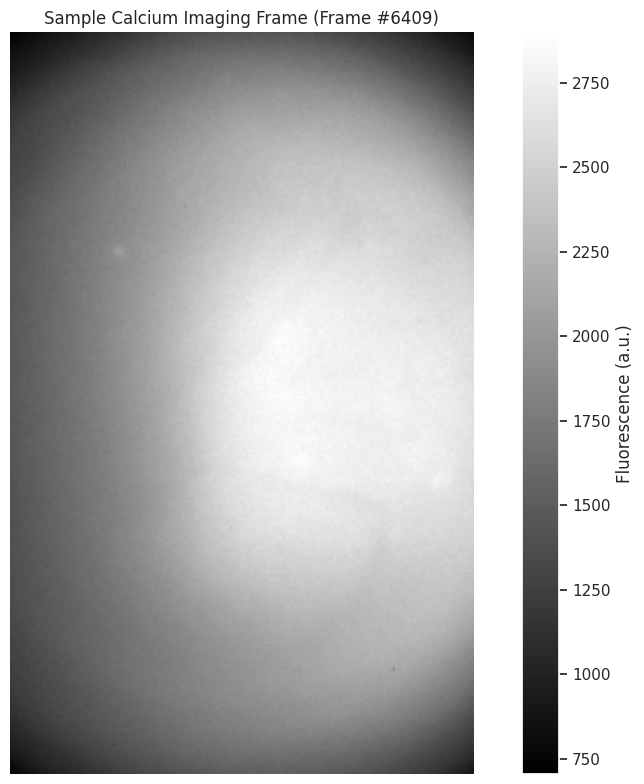

In [6]:
# Get a sample frame from the middle of the recording
frame_idx = one_photon_series.data.shape[0] // 2
sample_frame = one_photon_series.data[frame_idx, :, :]

# Plot the sample frame
plt.figure(figsize=(10, 8))
plt.imshow(sample_frame, cmap='gray')
plt.colorbar(label='Fluorescence (a.u.)')
plt.title(f'Sample Calcium Imaging Frame (Frame #{frame_idx})')
plt.axis('off')
plt.tight_layout()
plt.show()

## Visualizing ROI Masks

Next, let's visualize the segmented ROIs (Regions of Interest) overlaid on the calcium imaging data. These ROIs represent the individual neurons or cellular components being tracked in the calcium imaging data.

ROI masks shape: (13, 295, 160)


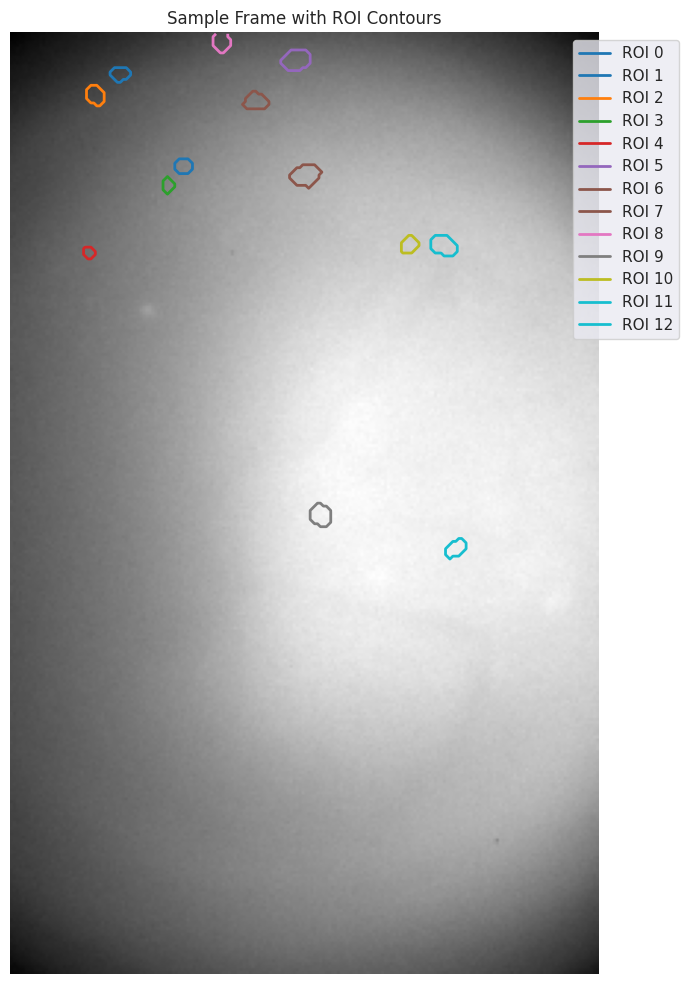

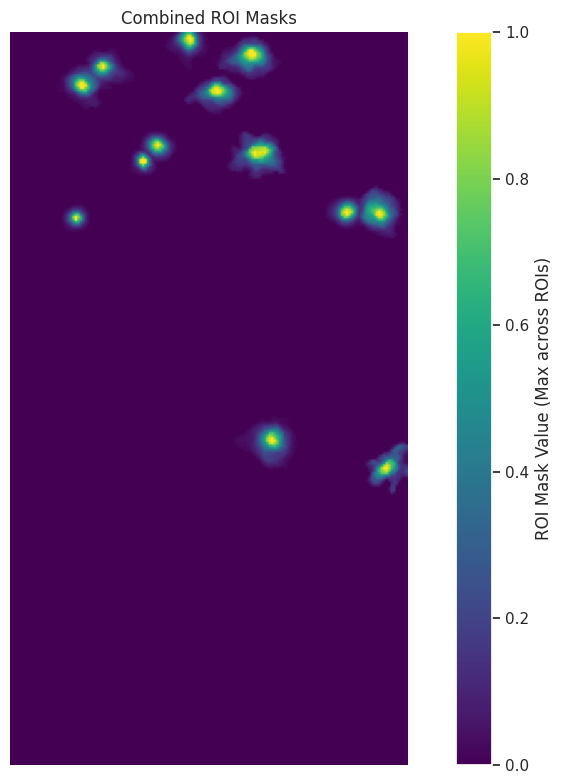

In [7]:
# Get ROI masks
roi_masks = []
for i in range(roi_count):
    roi_mask = np.array(plane_segmentation.image_mask[i])
    roi_masks.append(roi_mask)

roi_masks_array = np.array(roi_masks)
print(f"ROI masks shape: {roi_masks_array.shape}")

# Create a figure
plt.figure(figsize=(12, 10))

# Show the sample frame
plt.imshow(sample_frame, cmap='gray')
plt.title(f'Sample Frame with ROI Contours')

# Add contours for each ROI
colors = plt.cm.tab10(np.linspace(0, 1, roi_count))
for i in range(roi_count):
    mask = roi_masks_array[i]
    if np.max(mask) > 0:
        threshold = 0.5 * np.max(mask)
        binary_mask = mask > threshold
        plt.contour(binary_mask, levels=[0.5], colors=[colors[i]], linewidths=2)

# Add a legend
handles = [plt.Line2D([0], [0], color=colors[i], lw=2) for i in range(roi_count)]
plt.legend(handles, [f'ROI {i}' for i in range(roi_count)], loc='upper right', bbox_to_anchor=(1.15, 1))
plt.axis('off')
plt.tight_layout()
plt.show()

# Create a combined mask visualization (maximum across all ROIs)
combined_mask = np.max(roi_masks_array, axis=0)

# Plot the combined ROI mask
plt.figure(figsize=(10, 8))
plt.imshow(combined_mask, cmap='viridis')
plt.colorbar(label='ROI Mask Value (Max across ROIs)')
plt.title('Combined ROI Masks')
plt.axis('off')
plt.tight_layout()
plt.show()

The ROIs are distributed primarily in the upper portion of the field of view, with a few ROIs appearing in the lower part. Each ROI corresponds to a cellular region detected in the calcium imaging data.

## Exploring Fluorescence Traces

Now let's look at the fluorescence traces for some of the ROIs. These traces represent the calcium activity in each ROI over time.

Fluorescence data shape: (12819, 13)
Event data shape: (12819, 13)


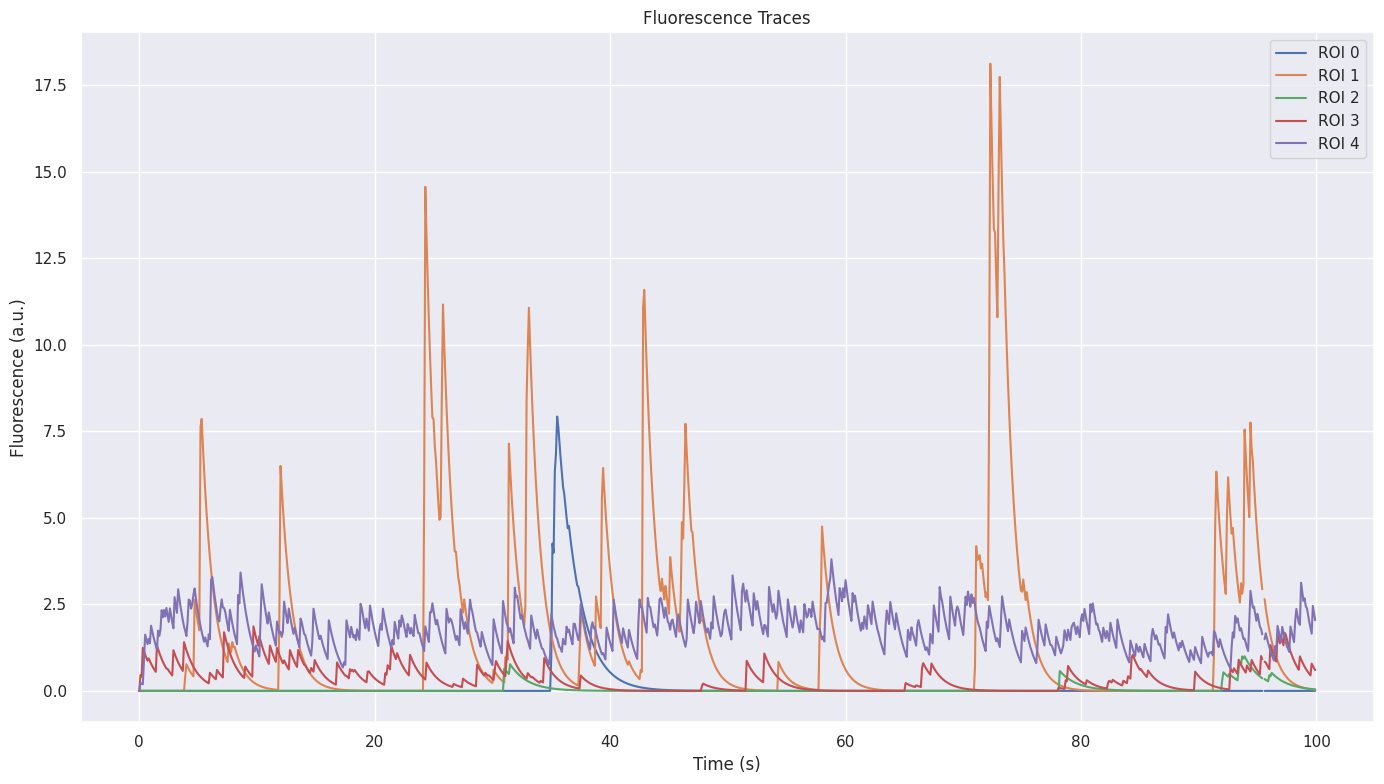

In [8]:
# Get fluorescence and event data
roi_response_series = nwb.processing['ophys'].data_interfaces['Fluorescence'].roi_response_series['RoiResponseSeries']
event_amplitude = nwb.processing['ophys'].data_interfaces['EventAmplitude']

print(f"Fluorescence data shape: {roi_response_series.data.shape}")
print(f"Event data shape: {event_amplitude.data.shape}")

# Plot fluorescence traces for a few ROIs
plt.figure(figsize=(14, 8))
# Create time array based on frame rate
time = np.arange(1000) / roi_response_series.rate  # First 1000 time points
# Plot first 5 ROIs (or all if less than 5)
num_roi_to_plot = min(5, roi_count)
for i in range(num_roi_to_plot):
    plt.plot(time, roi_response_series.data[:1000, i], label=f'ROI {i}')
    
plt.xlabel('Time (s)')
plt.ylabel('Fluorescence (a.u.)')
plt.title('Fluorescence Traces')
plt.legend()
plt.tight_layout()
plt.show()

The fluorescence traces show the calcium activity of each ROI over time. Higher values indicate increased calcium concentration, which is typically associated with neural activity. We can observe different patterns of activity across the ROIs, with some showing large transient increases (calcium events) and others showing more subtle changes.

## Analyzing Calcium Events

Let's analyze the calcium events more closely by looking at the event amplitude data in the NWB file. 

Calcium events represent transient increases in calcium concentration, which are often associated with neural activity. The event amplitude data represents the magnitude of these calcium events.

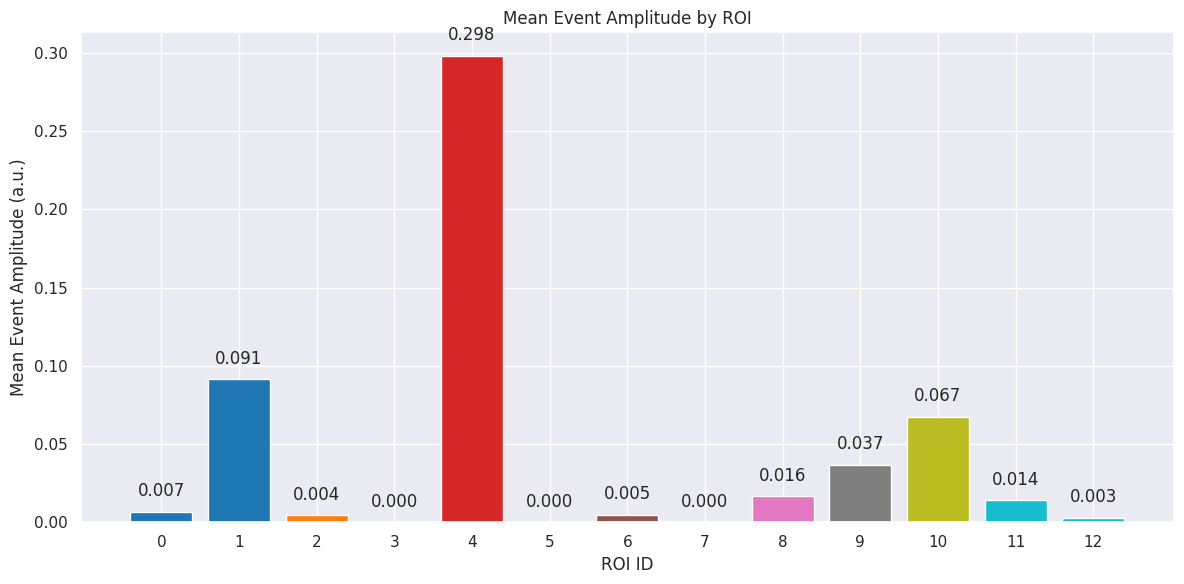

In [9]:
# Calculate mean event amplitude for each ROI
mean_events = np.mean(event_amplitude.data[:], axis=0)

# Plot mean event amplitude by ROI
plt.figure(figsize=(12, 6))
plt.bar(range(roi_count), mean_events, color=colors)
plt.xlabel('ROI ID')
plt.ylabel('Mean Event Amplitude (a.u.)')
plt.title('Mean Event Amplitude by ROI')
plt.xticks(range(roi_count))
for i, v in enumerate(mean_events):
    plt.text(i, v + 0.01, f"{v:.3f}", ha='center')
plt.tight_layout()
plt.show()

The mean event amplitude varies significantly across ROIs. ROI 4 stands out with the highest mean event amplitude, followed by ROIs 1 and 10. This suggests that these ROIs have more pronounced calcium events, which may indicate higher levels of neural activity.

## Visualizing Calcium Event Patterns

Let's create a heatmap to visualize the patterns of calcium events across all ROIs over time. This will help us see if there are any temporal patterns or synchronization in the calcium activity.

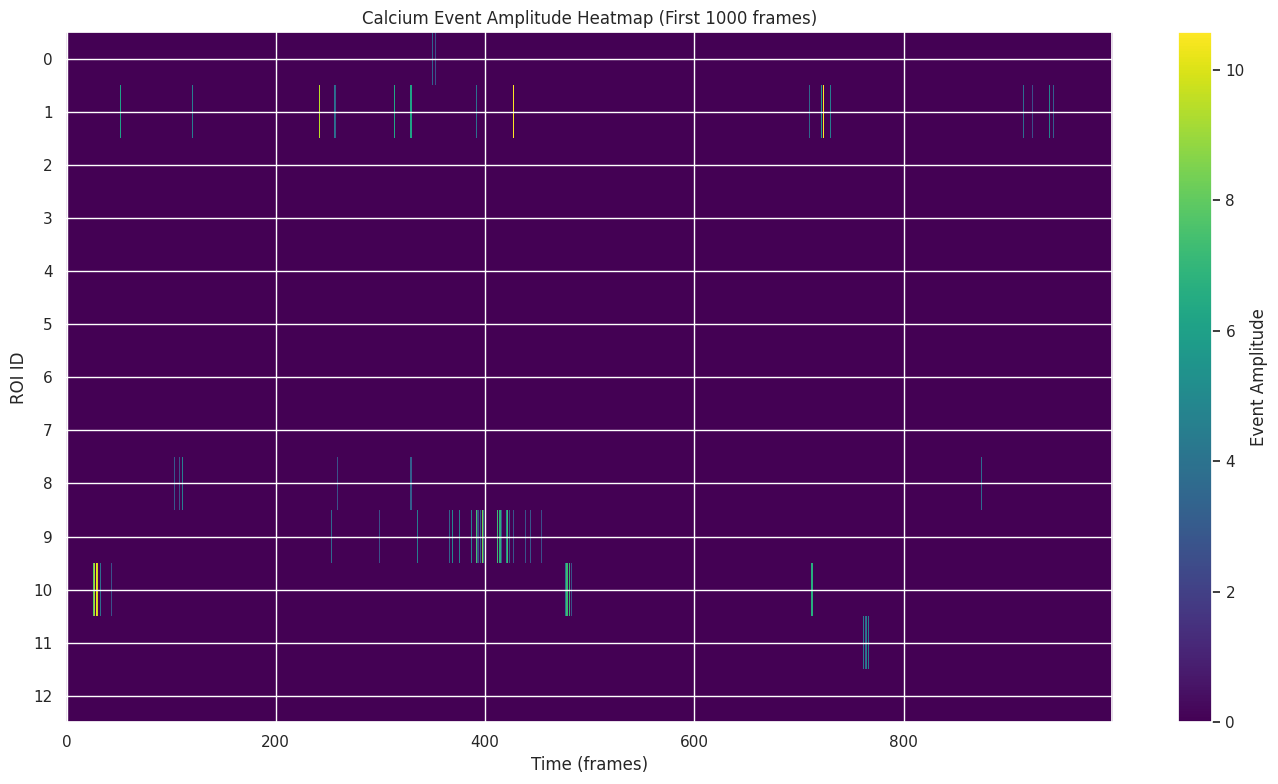

In [10]:
# Create a heatmap of calcium events over time
subset_length = 1000  # First 1000 time points
plt.figure(figsize=(14, 8))
plt.imshow(event_amplitude.data[:subset_length, :].T, 
           aspect='auto', 
           interpolation='none',
           cmap='viridis')
plt.colorbar(label='Event Amplitude')
plt.xlabel('Time (frames)')
plt.ylabel('ROI ID')
plt.yticks(range(roi_count))
plt.title('Calcium Event Amplitude Heatmap (First 1000 frames)')
plt.tight_layout()
plt.show()

The heatmap reveals interesting patterns of calcium events across different ROIs over time. We can observe that some ROIs (like ROI 4) have more frequent and higher amplitude events, while others show sparse or minimal activity. This visualization also helps identify any potential synchronization between different ROIs.

## Detailed Analysis of Selected ROIs

Let's take a closer look at the calcium activity in a few selected ROIs that show interesting patterns.

Event threshold: 0.494


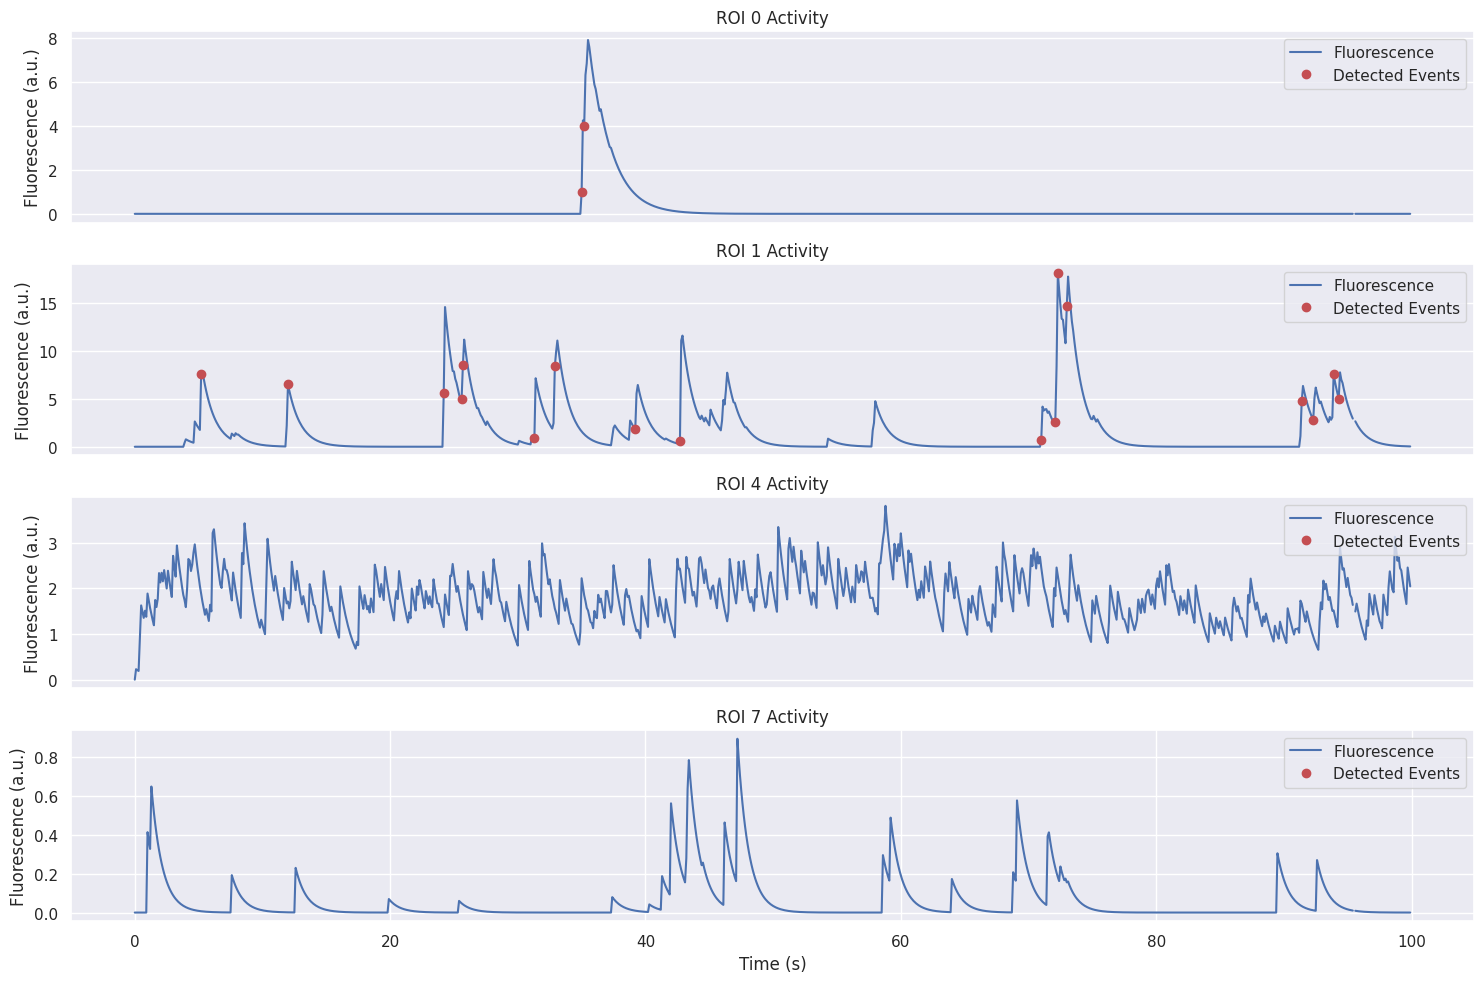

In [11]:
# Define threshold for what constitutes an event
event_threshold = np.mean(event_amplitude.data[:]) + np.std(event_amplitude.data[:])
print(f"Event threshold: {event_threshold:.3f}")

# Plot a few individual ROIs fluorescence traces with detected events highlighted
plt.figure(figsize=(15, 10))
time = np.arange(subset_length) / roi_response_series.rate  # Convert to seconds

# Plot for a few selected ROIs
selected_rois = [0, 1, 4, 7]  # Selected ROIs with interesting patterns
for i, roi_id in enumerate(selected_rois):
    plt.subplot(len(selected_rois), 1, i+1)
    
    # Plot fluorescence trace
    plt.plot(time, roi_response_series.data[:subset_length, roi_id], 'b-', label=f'Fluorescence')
    
    # Highlight events above threshold
    events_mask = event_amplitude.data[:subset_length, roi_id] > event_threshold
    plt.plot(time[events_mask], roi_response_series.data[:subset_length, roi_id][events_mask], 
             'ro', label='Detected Events')
    
    plt.xlabel('Time (s)') if i == len(selected_rois)-1 else plt.xticks([])
    plt.ylabel('Fluorescence (a.u.)')
    plt.title(f'ROI {roi_id} Activity')
    plt.legend(loc='upper right')

plt.tight_layout()
plt.show()

These detailed views of individual ROIs show the diverse patterns of calcium activity and events in different neurons:

- **ROI 0** shows sparse activity with a large calcium event around 40 seconds.
- **ROI 1** exhibits multiple calcium events of varying amplitudes throughout the recording.
- **ROI 4** displays continuous oscillatory activity with higher frequency but lower amplitude fluctuations.
- **ROI 7** shows periodic calcium events with lower amplitude than ROIs 0 and 1.

These different patterns could represent different types of neurons or neurons with different functional roles in the neural circuit.

## Calculating Event Frequency

Let's analyze how frequently calcium events occur in each ROI.

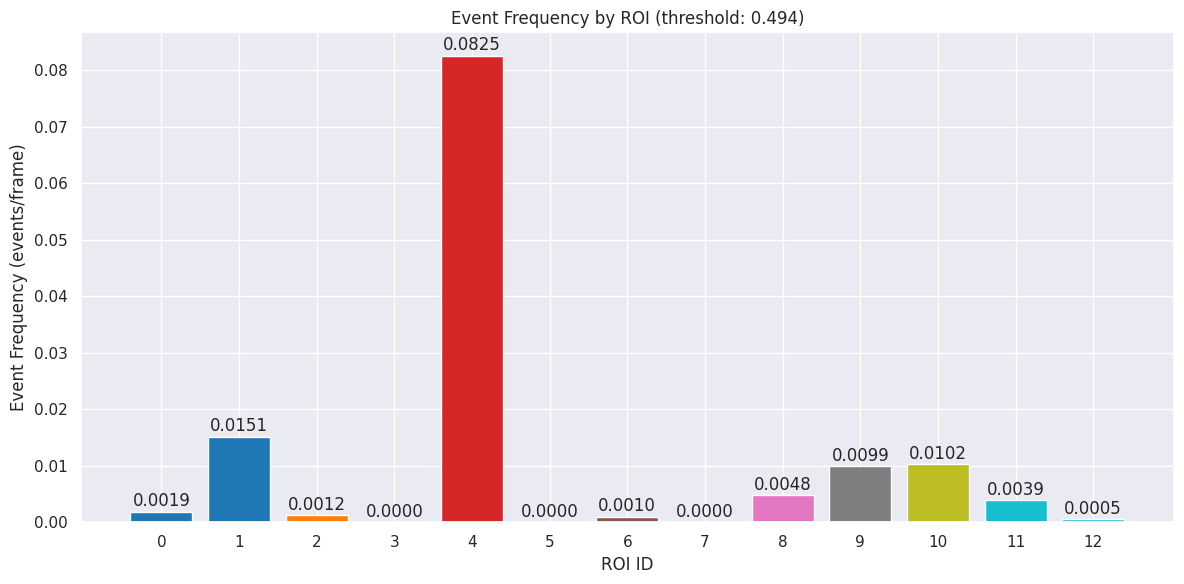

In [12]:
# Calculate event frequency (non-zero events) for each ROI
event_counts = np.sum(event_amplitude.data[:] > event_threshold, axis=0)
event_frequency = event_counts / event_amplitude.data.shape[0]  # Events per frame

plt.figure(figsize=(12, 6))
plt.bar(range(roi_count), event_frequency, color=colors)
plt.xlabel('ROI ID')
plt.ylabel('Event Frequency (events/frame)')
plt.title(f'Event Frequency by ROI (threshold: {event_threshold:.3f})')
plt.xticks(range(roi_count))
for i, v in enumerate(event_frequency):
    plt.text(i, v + 0.001, f"{v:.4f}", ha='center')
plt.tight_layout()
plt.show()

The event frequency analysis confirms what we observed in the earlier visualizations:

- **ROI 4** has the highest event frequency, indicating the most active neuron in the dataset.
- **ROIs 1, 9, and 10** also show notable event frequencies, though much lower than ROI 4.
- Several ROIs (3, 5, 7) show very low or zero event frequencies, suggesting minimal activity.

This pattern of activity frequency is consistent with the mean event amplitude results, with the most active neurons showing both higher amplitude and frequency of calcium events.

## Exploring the Neurosift Link

You can also explore this NWB file interactively online using the Neurosift web application. Here's the link for the NWB file we've been analyzing:

[View on Neurosift](https://neurosift.app/nwb?url=https://api.dandiarchive.org/api/assets/628c87ee-c3e1-44f3-b4b4-54aa67a0f6e4/download/&dandisetId=001174&dandisetVersion=0.250331.2218)

The Neurosift viewer provides an interactive way to explore the NWB file's contents, including the calcium imaging data and ROIs.

## Summary

In this notebook, we've explored calcium imaging data from the SMA (Supplementary Motor Area) of a macaque from Dandiset 001174. We've:

1. Loaded and examined the metadata of the Dandiset
2. Loaded an NWB file containing calcium imaging data
3. Visualized calcium imaging frames and ROI masks
4. Analyzed fluorescence traces and calcium events
5. Examined patterns of neural activity across different ROIs

The analysis revealed diverse patterns of calcium activity across the 13 ROIs, with some neurons showing pronounced calcium events and others displaying minimal activity. ROI 4 stood out with the highest event amplitude and frequency, suggesting it may play a particularly important role in the neural circuit being imaged.

## Future Directions

This analysis could be extended in several ways:

1. **Comparison between conditions**: Analyze how neural activity differs between rest and arm-reaching tasks
2. **Cross-correlation analysis**: Examine the temporal relationships between ROIs to identify functional connectivity
3. **Population dynamics**: Analyze the collective activity patterns of the neuronal population
4. **Comparison between brain regions**: Compare activity patterns between SMA and M1 recordings
5. **Advanced event detection**: Apply more sophisticated algorithms for detecting and characterizing calcium events

These approaches would provide deeper insights into the functional organization and dynamics of neurons in the motor cortices of non-human primates.